**CREATED AND ANALYZED BY IBRAHIM ABU SAIID**

---



# **TOPIC: Analyzing the Relationship of Housing-Related Factors in Various  Regions and  Locations, and Their Impact on Housing Affordability**



---

**CONTENT:**
1. **Importing Libraries**
2. **Loading the dataset:** Load the data
3. **Data Preprocessing:**
  - Checking for Null Values
  - Checking for Duplicate Values
4. **EDA**
5. **Analysis**



---


**DATA SCIENCE QUESTIONS:**

1. What is the distribution of cost burden of renters and owners across different regions?

2. How does the location, like being in a city center or suburbs, impact how affordable housing is for people?

3. What is the relationship between perceived housing adequacy and housing cost burdens based on the location, and are there specific cost-related patterns associated with different adequacy categories?

4. How does the affordability of assisted housing units compare to non-assisted units?

5. Despite similar average incomes between assisted and non-assisted housing units in both Poverty and AMI income categories, what factors contribute to the provision of assistance to these households?

6. How does the relationship between utility costs and housing burden change based on the number of people in a household and the available bedrooms?

7. How does the household size influence the affordability of housing, particularly in relation to the top burden categories associated with different household sizes?

8. How does the burden of housing costs change with the age of the head of the household?


---



**1. Importing Libraries**




In [70]:
# Importing necessary libraries for data manipulation (NumPy), plotting (Matplotlib), and enhanced visualization (Seaborn).
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# Install OpenJDK 8 headless (no GUI) for Java.
!apt-get install openjdk-8-jdk-headless -qq> /dev/null

In [72]:
# Download Apache Spark 3.3.4 binary with Hadoop 3 support.
!wget -q https://dlcdn.apache.org/spark/spark-3.3.4/spark-3.3.4-bin-hadoop3.tgz

In [73]:
# Extract Apache Spark archive.
!tar xf spark-3.3.4-bin-hadoop3.tgz

In [74]:
# Set environment variables for Java and Spark home paths.
import os
os.environ["JAVA_HOME"]="/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"]='/content/spark-3.3.4-bin-hadoop3'

In [75]:
# Install findspark to locate and use Spark in Python.
!pip install -q findspark
import findspark

In [76]:
# Initialize findspark to set up the necessary environment variables for Spark.
findspark.init()

In [77]:
# Find and return the Spark home directory.
findspark.find()

'/content/spark-3.3.4-bin-hadoop3'

In [78]:
# Import PySpark library for Spark functionality in Python.
import pyspark

In [79]:
# Import specific functions and modules from PySpark for data manipulation and analysis.
from pyspark.sql.functions import col, when, trim, avg, count, asc, desc, sum
from pyspark.sql import functions as F

**2. Loading the dataset**

In [80]:
# Mount Google Drive to access and save files in Google Colab.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
# Create a Spark session and read housing data from a CSV file into a DataFrame.
from pyspark.sql import SparkSession

# Initialize Spark session with an application name
spark = SparkSession.builder.appName('Housing_Affordability_&_Cost_Burden').getOrCreate()

# Read housing data from a CSV file into a DataFrame.
data = spark.read.csv('/content/drive/My Drive/housdata.csv', header=True, inferSchema=True)



**3. Data Preprocessing:**





-   Checking for Null Values




In [82]:
# Count total null values for each column in all dataset
data_null = data.select([sum(col(c).isNull().cast("int")).alias(c) for c in data.columns])

# Printing null values
print("No Null Values")
data_null.show()

No Null Values
+-------+----+------+---+------+------+----+---+---+---+---+----+-----+------+----+-------+-----+-------+------+------+-----+-----+-----+-----+------+-------------+-------+-------+---------+------+------+------+-------+------+--------+-----+----+----+----+------+-----+-----+-----+------+------+------------+------------+------------+------------+------------+------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+----------------+----------------+----------------+----------------+----------------+----------------+--------+---------+--------+----------------+---------+----------+------------------+------------------+------------------+-------------------+---------------+------------------+------------------+------------------+------

- Checking for Duplicate Values

In [83]:
# Dropping duplicates for the dataset
data_duplicate = data.groupBy(data.columns).count().filter(col('count') > 1).count()
# Print the number of duplicated rows
print("There were {} duplicated rows in the data, no rows needed to be dropped".format(data_duplicate))

There were 0 duplicated rows in the data, no rows needed to be dropped


**4. EDA**

-  Percentage of renters and owners across different regions.

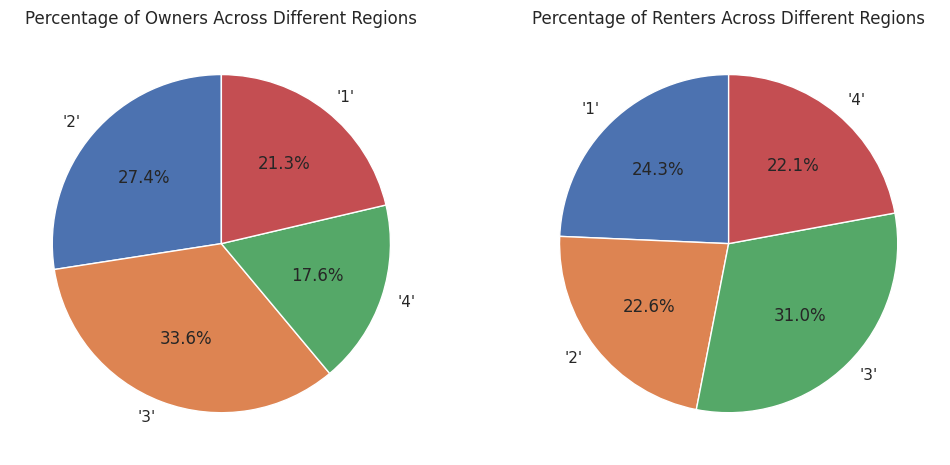

In [84]:
# Selecting data for our EDA
eda_1 = data.select('OWNRENT', 'REGION').orderBy(asc('REGION'))

import pandas as pd

# Group by 'REGION' and 'OWNRENT', find the count for each group
eda_1_counts = eda_1.groupBy('REGION', 'OWNRENT').count()

# Filter 'OWNRENT' containing '1' (for 'OWNER')
eda_1_owner = eda_1_counts.filter(col('OWNRENT').contains('1'))

# Filter 'OWNRENT' containing '2' (for 'RENTER')
eda_1_renter = eda_1_counts.filter(col('OWNRENT').contains('2'))

# Convert to Pandas DataFrames for easier plotting
eda_1_owner_pd = eda_1_owner.toPandas()
eda_1_renter_pd = eda_1_renter.toPandas()

# Plotting pie charts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(eda_1_owner_pd['count'], labels=eda_1_owner_pd['REGION'], autopct='%1.1f%%', startangle=90,)
plt.title('Percentage of Owners Across Different Regions')

plt.subplot(1, 2, 2)
plt.pie(eda_1_renter_pd['count'], labels=eda_1_renter_pd['REGION'], autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Renters Across Different Regions')

plt.show()

-  Pecentage of housing units in the city center and suburb.

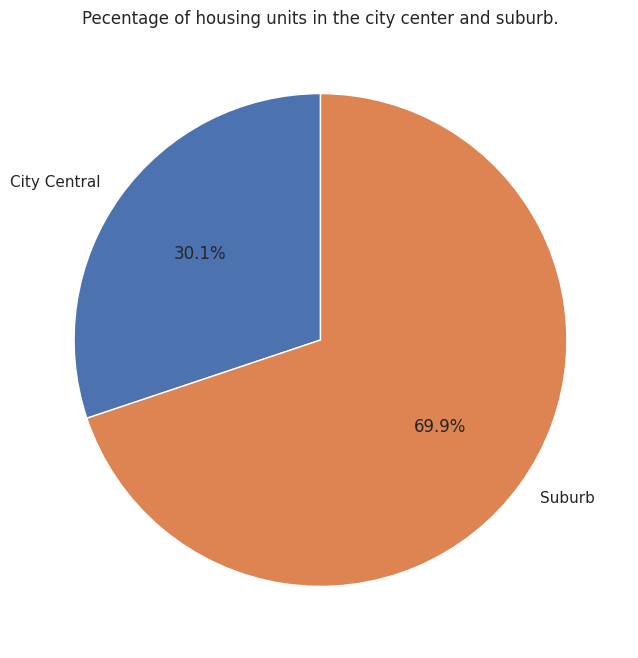

In [85]:
# Selecting data for our EDA
eda_2 = data.select('FMTMETRO3')

# Select the 'FMTMETRO3' column and group by its categories to find the count for each
eda_2_counts = eda_2.groupBy('FMTMETRO3').count()

# Convert to Pandas DataFrame for easier plotting
eda_2_pd = eda_2_counts.toPandas()

# Plotting pie chart
plt.figure(figsize=(8, 8))
plt.pie(eda_2_pd['count'], labels=['City Central','Suburb'], autopct='%1.1f%%', startangle=90)
plt.title('Pecentage of housing units in the city center and suburb.')
plt.show()

- Percentage of assisted and non-assisted housing units

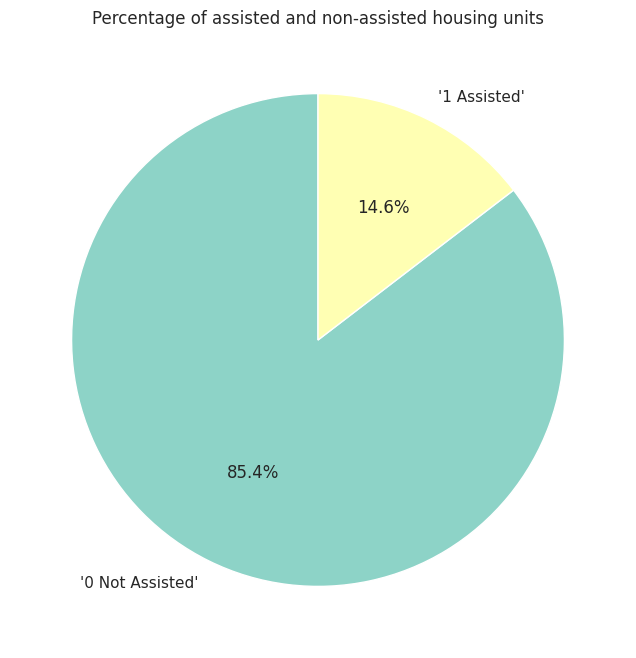

In [86]:
# Selecting data for our EDA
eda_3 = data.select('FMTASSISTED')

# Removing Incomprehensible values
eda_3 = eda_3.filter(~col('FMTASSISTED').contains('.'))

# Select the 'FMTASSISTED' column and group by its categories to find the count for each
eda_3_counts = eda_3.groupBy('FMTASSISTED').count()

# Convert to Pandas DataFrame for easier plotting
eda_3_pd = eda_3_counts.toPandas()

# Use a predefined color palette from plt
colors = plt.cm.Set3.colors

# Plotting pie chart with predefined colors
plt.figure(figsize=(8, 8))
plt.pie(eda_3_pd['count'], labels=eda_3_pd['FMTASSISTED'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentage of assisted and non-assisted housing units')
plt.show()

**5. Analysis**

1. what is the disribution of cost burden of renters and owners across diffrent regions?

In [87]:
# Select the required columns
data5 = data.select('OWNRENT', 'REGION', 'FMTBURDEN' )

# Remove rows with '.' in FMTBURDEN
data5 = data5.filter(~col('FMTBURDEN').contains('.'))

# Showing distinct values in 'OWNRENT' and 'REGION' columns.
data5.select('OWNRENT').distinct().show()
data5.select('REGION').distinct().show()
data5.select('FMTBURDEN').distinct().show()

# Displaying the contents of the DataFrame 'data5'.
data5.show()

+-------+
|OWNRENT|
+-------+
|    '2'|
|    '1'|
+-------+

+------+
|REGION|
+------+
|   '3'|
|   '2'|
|   '1'|
|   '4'|
+------+

+-----------------+
|        FMTBURDEN|
+-----------------+
|'1 Less than 30%'|
|    '4 No Income'|
|  '3 50% or More'|
|   '2 30% to 50%'|
+-----------------+

+-------+------+-----------------+
|OWNRENT|REGION|        FMTBURDEN|
+-------+------+-----------------+
|    '1'|   '1'|'1 Less than 30%'|
|    '1'|   '1'|'1 Less than 30%'|
|    '1'|   '3'|'1 Less than 30%'|
|    '1'|   '3'|   '2 30% to 50%'|
|    '2'|   '3'|  '3 50% or More'|
|    '2'|   '3'|'1 Less than 30%'|
|    '1'|   '3'|'1 Less than 30%'|
|    '1'|   '4'|'1 Less than 30%'|
|    '2'|   '2'|'1 Less than 30%'|
|    '1'|   '3'|'1 Less than 30%'|
|    '1'|   '2'|'1 Less than 30%'|
|    '2'|   '2'|'1 Less than 30%'|
|    '1'|   '2'|   '2 30% to 50%'|
|    '1'|   '2'|'1 Less than 30%'|
|    '1'|   '2'|'1 Less than 30%'|
|    '2'|   '3'|  '3 50% or More'|
|    '2'|   '3'|'1 Less than 30%'|
|    

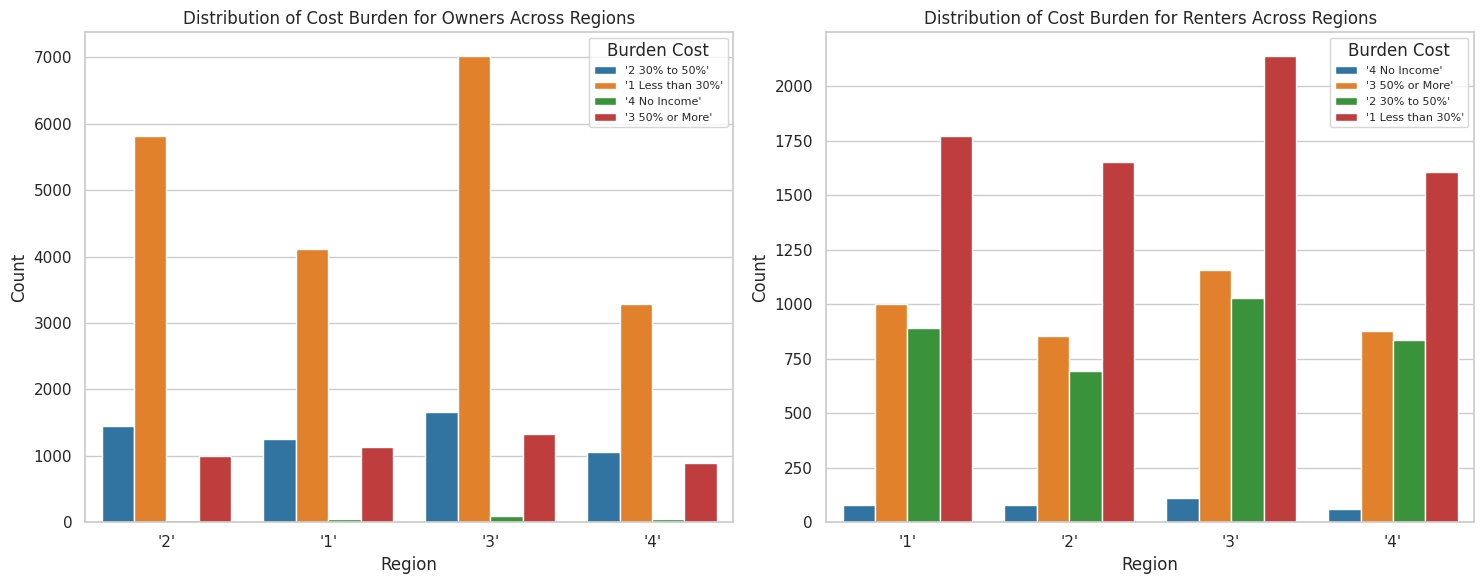

In [88]:
# Filter data for owners and renters
data_owners = data5.filter(col('OWNRENT').contains('1'))
data_renters = data5.filter(col('OWNRENT').contains('2'))

# Group by REGION and FMTBURDEN, and calculate the count for owners
data_owners_grouped = data_owners.groupBy("REGION", "FMTBURDEN").count().toPandas()

# Group by REGION and FMTBURDEN, and calculate the count for renters
data_renters_grouped = data_renters.groupBy("REGION", "FMTBURDEN").count().orderBy(asc('REGION')).toPandas()

# Set seaborn style
sns.set(style="whitegrid")

# Plotting the bar charts with side-by-side bars using seaborn
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Owners
sns.barplot(x='REGION', y='count', hue='FMTBURDEN', palette='tab10', data=data_owners_grouped, ax=axes[0])
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Cost Burden for Owners Across Regions')
axes[0].legend(title='Burden Cost', loc='upper right', fontsize=8)

# Renters
sns.barplot(x='REGION', y='count', hue='FMTBURDEN', palette='tab10', data=data_renters_grouped, ax=axes[1])
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of Cost Burden for Renters Across Regions')
axes[1].legend(title='Burden Cost', loc='upper right', fontsize=8)

# Display the plots
plt.tight_layout()
plt.show()

2. How does the location, like being in a city center or suburbs, impact how affordable housing is for people?

In [89]:
# Select the required columns
data1 = data.select('ZINC2', 'FMTINCRELAMICAT', 'FMTMETRO3').orderBy(asc('FMTINCRELAMICAT')).orderBy(asc('FMTINCRELAMICAT'))

# Remove rows with '.' in FMTINCRELAMICAT
data1 = data1.filter(~col('FMTINCRELAMICAT').contains('.'))

# Showing distinct values in 'FMTMETRO3T' and 'FMTINCRELAMICAT columns.
data.select('FMTMETRO3').distinct().show()
data.select('FMTINCRELAMICAT').distinct().show()

# Displaying the contents of the DataFrame 'data1'
data1.show()

+--------------+
|     FMTMETRO3|
+--------------+
|'Central City'|
|          '-5'|
+--------------+

+------------------+
|   FMTINCRELAMICAT|
+------------------+
|  '2 30 - 50% AMI'|
|               '.'|
|  '3 50 - 60% AMI'|
| '5 80 - 100% AMI'|
|  '4 60 - 80% AMI'|
|'6 100 - 120% AMI'|
|   '1 LTE 30% AMI'|
|    '7 120% AMI +'|
+------------------+

+-----+---------------+--------------+
|ZINC2|FMTINCRELAMICAT|     FMTMETRO3|
+-----+---------------+--------------+
|12000|'1 LTE 30% AMI'|'Central City'|
|10000|'1 LTE 30% AMI'|'Central City'|
|12000|'1 LTE 30% AMI'|          '-5'|
| 5500|'1 LTE 30% AMI'|'Central City'|
|15000|'1 LTE 30% AMI'|'Central City'|
| 2200|'1 LTE 30% AMI'|'Central City'|
|15000|'1 LTE 30% AMI'|          '-5'|
|22500|'1 LTE 30% AMI'|          '-5'|
| 8448|'1 LTE 30% AMI'|'Central City'|
|16000|'1 LTE 30% AMI'|          '-5'|
|12012|'1 LTE 30% AMI'|          '-5'|
|19312|'1 LTE 30% AMI'|          '-5'|
|13060|'1 LTE 30% AMI'|          '-5'|
|    0|'1 LTE 30% AM

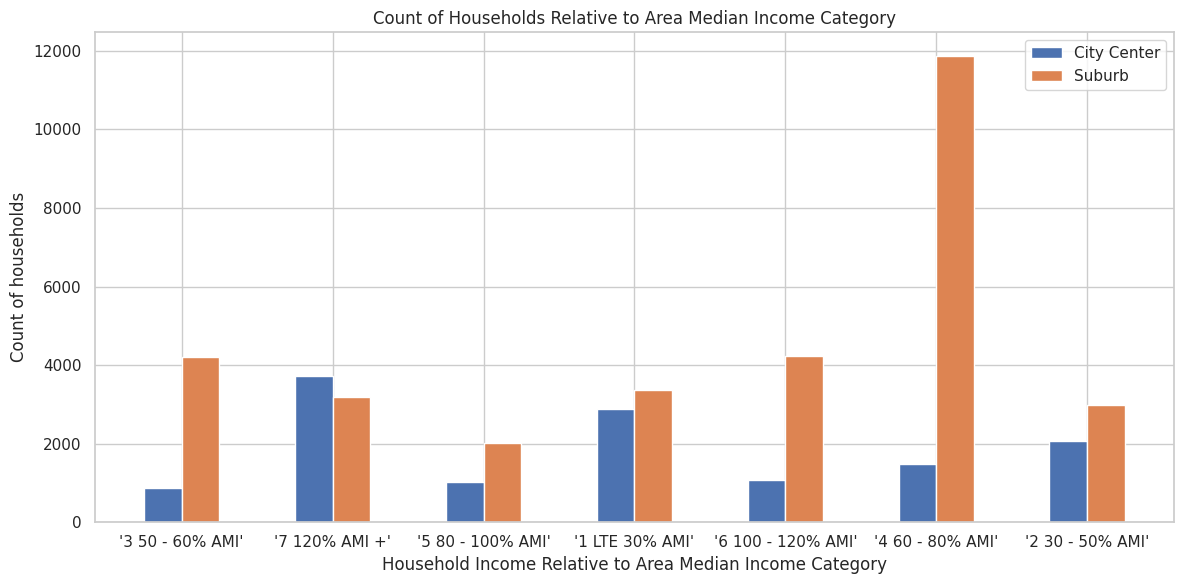

In [90]:
# Group by FMTMETRO3 and FMTINCRELAMICAT and calculate the count
data1_grouped = data1.groupBy('FMTMETRO3', 'FMTINCRELAMICAT').count()

# Convert PySpark DataFrame to Pandas DataFrame
count_data_pandas = data1_grouped.toPandas()

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Get unique FMTMETRO3 categories from the DataFrame
fmtmetro3_categories = count_data_pandas['FMTMETRO3'].unique()

# Calculate the total number of categories
num_categories = len(fmtmetro3_categories)

# Define the width of each bar
bar_width = 0.25

# Iterate through each FMTMETRO3 category
for i, category in enumerate(fmtmetro3_categories):
    # Filter data for the specific FMTMETRO3 category
    temp_df = count_data_pandas[count_data_pandas['FMTMETRO3'] == category]

    # Calculate the positions for bars
    positions = np.arange(len(temp_df['FMTINCRELAMICAT'])) + i * bar_width

    # Plotting the bar chart for each category
    ax.bar(positions, temp_df['count'], label=category, width=bar_width)

# Adding labels and title
ax.set_xlabel('Household Income Relative to Area Median Income Category')
ax.set_ylabel('Count of households')
ax.set_title('Count of Households Relative to Area Median Income Category')

# Set the legend using original category values
ax.legend(title='Location')

# Change the labels in the legend
legend = ax.legend()
legend.get_texts()[0].set_text('City Center')
legend.get_texts()[1].set_text('Suburb')

# Adjust x-axis ticks and labels
ax.set_xticks(np.arange(len(count_data_pandas['FMTINCRELAMICAT'].unique())) + (num_categories - 1) * bar_width / 2)
ax.set_xticklabels(count_data_pandas['FMTINCRELAMICAT'].unique())

# Display the plot
plt.tight_layout()
plt.show()

In [91]:
# Select the required columns
data2 = data.select('ZSMHC', 'FMTCOSTMEDRELAMICAT', 'FMTMETRO3').orderBy(asc('FMTCOSTMEDRELAMICAT'))

# Remove rows with '.' in FMTCOSTMEDRELAMICAT
data2 = data2.filter(~col('FMTCOSTMEDRELAMICAT').contains('.'))

data2.show()

+-----+-------------------+--------------+
|ZSMHC|FMTCOSTMEDRELAMICAT|     FMTMETRO3|
+-----+-------------------+--------------+
|  349|    '1 LTE 30% AMI'|          '-5'|
|  106|    '1 LTE 30% AMI'|'Central City'|
|  463|    '1 LTE 30% AMI'|'Central City'|
|    0|    '1 LTE 30% AMI'|          '-5'|
|  305|    '1 LTE 30% AMI'|'Central City'|
|   -6|    '1 LTE 30% AMI'|'Central City'|
|  646|    '1 LTE 30% AMI'|          '-5'|
| 3246|    '1 LTE 30% AMI'|          '-5'|
|  196|    '1 LTE 30% AMI'|'Central City'|
|  268|    '1 LTE 30% AMI'|'Central City'|
|   92|    '1 LTE 30% AMI'|'Central City'|
|   -6|    '1 LTE 30% AMI'|'Central City'|
|  366|    '1 LTE 30% AMI'|          '-5'|
|  259|    '1 LTE 30% AMI'|          '-5'|
|  358|    '1 LTE 30% AMI'|          '-5'|
|  250|    '1 LTE 30% AMI'|'Central City'|
| 3461|    '1 LTE 30% AMI'|          '-5'|
|  410|    '1 LTE 30% AMI'|'Central City'|
|  848|    '1 LTE 30% AMI'|'Central City'|
|  439|    '1 LTE 30% AMI'|'Central City'|
+-----+----

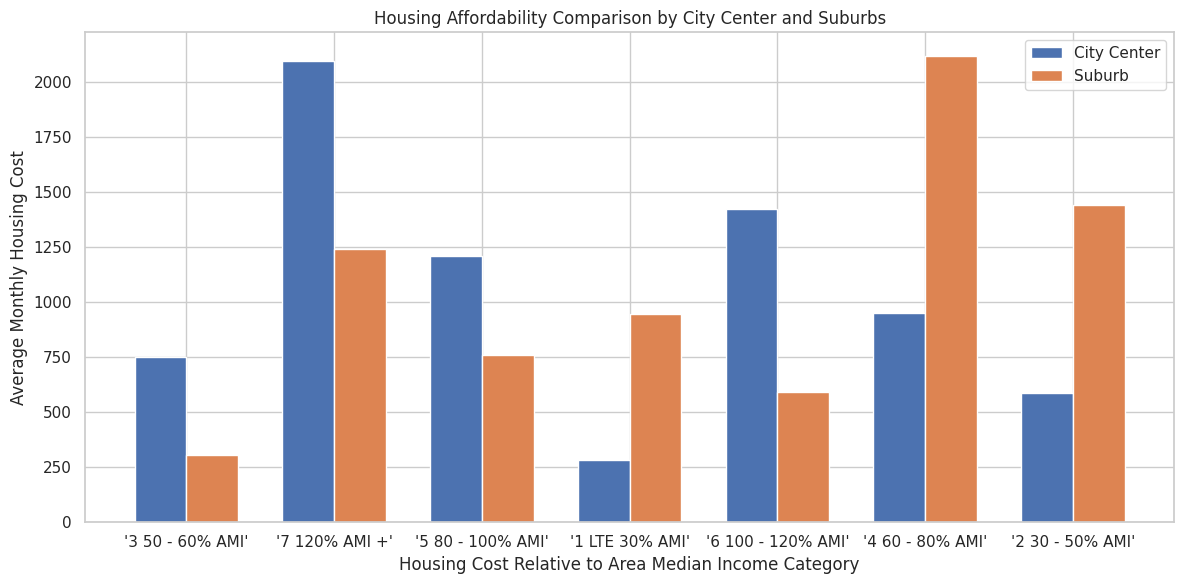

In [92]:
# Group by FMTMETRO3 and FMTCOSTMEDRELAMICAT, and calculate the average housing cost
data2_grouped = data2.groupBy('FMTMETRO3', 'FMTCOSTMEDRELAMICAT').agg(avg('ZSMHC').alias('avg_housing_cost'))

# Convert PySpark DataFrame to Pandas DataFrame
avg_cost_pandas = data2_grouped.toPandas()

# Plotting the grouped bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Get unique FMTMETRO3 categories from the DataFrame
fmtmetro3_categories = avg_cost_pandas['FMTMETRO3'].unique()

# Calculate the total number of categories
num_categories = len(fmtmetro3_categories)

# Define the width of each bar
bar_width = 0.35  # Width of each grouped bar

# Iterate through each FMTMETRO3 category
for i, category in enumerate(fmtmetro3_categories):
    # Filter data for the specific FMTMETRO3 category
    temp_df = avg_cost_pandas[avg_cost_pandas['FMTMETRO3'] == category]

    # Calculate the positions for bars
    positions = np.arange(len(temp_df['FMTCOSTMEDRELAMICAT'])) + i * bar_width

    # Plotting the grouped bar chart for each category
    ax1.bar(positions, temp_df['avg_housing_cost'], label=f'{category} - Average Housing Cost', width=bar_width)

# Adding labels and title
ax1.set_xlabel('Housing Cost Relative to Area Median Income Category')
ax1.set_ylabel('Average Monthly Housing Cost')
ax1.set_title('Housing Affordability Comparison by City Center and Suburbs')

# Set the legend using original category values
ax1.legend(title='Location')

# Change the labels in the legend
legend = ax1.legend()
legend.get_texts()[0].set_text('City Center')
legend.get_texts()[1].set_text('Suburb')

# Adjust x-axis ticks and labels
ax1.set_xticks(np.arange(len(avg_cost_pandas['FMTCOSTMEDRELAMICAT'].unique())) + (num_categories - 1) * bar_width / 2)
ax1.set_xticklabels(avg_cost_pandas['FMTCOSTMEDRELAMICAT'].unique())

# Display the plot
plt.tight_layout()
plt.show()

3. What is the relationship between perceived housing adequacy and housing cost burdens based on the location, and are there specific cost-related patterns associated with different adequacy categories?

In [93]:
# Select the required columns
data8 = data.select('BURDEN', 'FMTMETRO3', 'FMTZADEQ').orderBy(asc('FMTZADEQ'))

# Remove rows with '-5' in FMTZADEQ
data8 = data8.filter(~col('FMTZADEQ').contains(-5))

data8.select('BURDEN').distinct().show()
data8.select('FMTMETRO3').distinct().show()
data8.select('FMTZADEQ').distinct().show()

data8.show()

+-----------+
|     BURDEN|
+-----------+
|0.433062483|
|0.009022448|
|0.467508772|
|0.136182336|
|0.194709677|
|0.254836364|
|0.073472475|
|0.211569231|
|0.189458824|
|6.084084084|
|0.187612903|
|0.263529412|
|0.291781959|
|0.128467602|
|       0.66|
|     0.7371|
|      0.204|
|     0.6243|
|    0.17568|
|0.168680641|
+-----------+
only showing top 20 rows

+--------------+
|     FMTMETRO3|
+--------------+
|'Central City'|
|          '-5'|
+--------------+

+--------------------+
|            FMTZADEQ|
+--------------------+
|        '1 Adequate'|
|'3 Severely Indad...|
|'2 Moderately Ina...|
+--------------------+

+-----------+--------------+------------+
|     BURDEN|     FMTMETRO3|    FMTZADEQ|
+-----------+--------------+------------+
|0.231246201|          '-5'|'1 Adequate'|
|      1.164|'Central City'|'1 Adequate'|
|0.171666667|          '-5'|'1 Adequate'|
|     0.3555|          '-5'|'1 Adequate'|
|     0.0488|          '-5'|'1 Adequate'|
|0.161966559|          '-5'|'1 Adequa

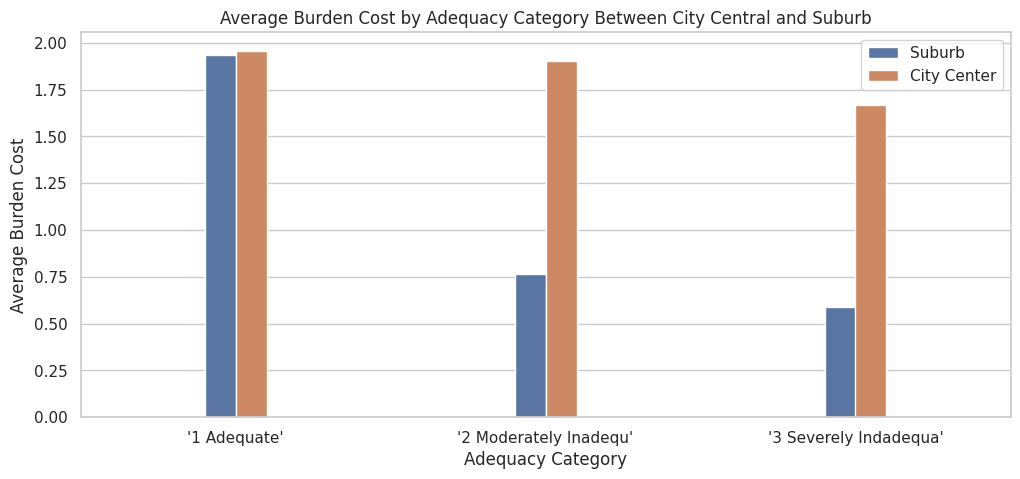

In [94]:
# Group by adequacy category and calculate the average burden cost for each location
data_grouped = data8.groupBy('FMTZADEQ', 'FMTMETRO3').agg(avg('BURDEN').alias('avg_burden_cost'))

# Convert PySpark DataFrame to Pandas DataFrame for plotting with Seaborn
data_grouped_pandas = data_grouped.toPandas()

# Plotting the bar chart with side-by-side bars using Seaborn
plt.figure(figsize=(12, 5))
ax = sns.barplot(x='FMTZADEQ', y='avg_burden_cost', hue='FMTMETRO3', data=data_grouped_pandas, width=0.2, dodge=3)

plt.xlabel('Adequacy Category')
plt.ylabel('Average Burden Cost')
plt.title('Average Burden Cost by Adequacy Category Between City Central and Suburb')
plt.legend(title='Location')


# Change the labels in the legend
legend = ax.legend()
legend.get_texts()[0].set_text('Suburb')
legend.get_texts()[1].set_text('City Center')

plt.show()

4. How does the affordability of assisted housing units compare to non-assisted units?

In [95]:
# Select the required columns
data6 = data.select('FMTASSISTED','FMTBURDEN','ZINC2','FMTINCRELPOVCAT','FMTINCRELAMICAT')

# Remove rows with '.' in FMTBURDEN and FMTASSISTED
data6 = data6.filter(~col('FMTBURDEN').contains('.'))
data6 = data6.filter(~col('FMTASSISTED').contains('.'))

# Showing distinct values
data6.select('FMTASSISTED').distinct().show()
data6.select('FMTINCRELPOVCAT').distinct().show()
data6.select('FMTINCRELAMICAT').distinct().show()
data6.select('FMTBURDEN').distinct().show()

data6.show()

+----------------+
|     FMTASSISTED|
+----------------+
|'0 Not Assisted'|
|    '1 Assisted'|
+----------------+

+--------------------+
|     FMTINCRELPOVCAT|
+--------------------+
|'3 150-200% Poverty'|
|     '1 LTE Poverty'|
|'2 100-150% Poverty'|
|   '4 200%+ Poverty'|
+--------------------+

+------------------+
|   FMTINCRELAMICAT|
+------------------+
|  '2 30 - 50% AMI'|
|  '3 50 - 60% AMI'|
| '5 80 - 100% AMI'|
|  '4 60 - 80% AMI'|
|'6 100 - 120% AMI'|
|   '1 LTE 30% AMI'|
|    '7 120% AMI +'|
+------------------+

+-----------------+
|        FMTBURDEN|
+-----------------+
|'1 Less than 30%'|
|    '4 No Income'|
|  '3 50% or More'|
|   '2 30% to 50%'|
+-----------------+

+----------------+-----------------+-----+--------------------+------------------+
|     FMTASSISTED|        FMTBURDEN|ZINC2|     FMTINCRELPOVCAT|   FMTINCRELAMICAT|
+----------------+-----------------+-----+--------------------+------------------+
|'0 Not Assisted'|  '3 50% or More'|15600|'2 100-150% Pove

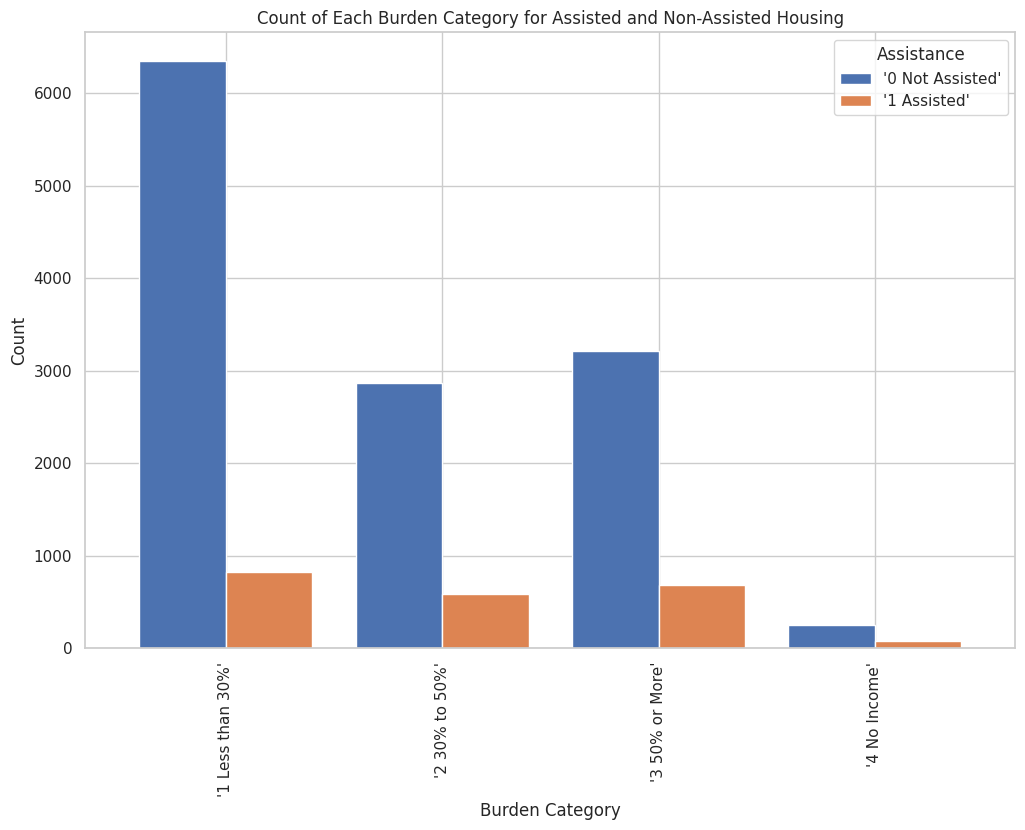

In [96]:
# Calculate the count of each burden category
burden_count = data6.groupBy('FMTASSISTED', 'FMTBURDEN').agg(count('*').alias('count'))

# Convert PySpark DataFrame to Pandas DataFrame for plotting
burden_count_pandas = burden_count.toPandas()

# Pivot the DataFrame for better visualization
burden_count_pivot = burden_count_pandas.pivot_table(index=['FMTBURDEN'], columns='FMTASSISTED', values='count', aggfunc='sum')

# Plotting the bar graph with side-by-side bars
burden_count_pivot.plot(kind='bar', figsize=(12, 8), width=0.8)
plt.xlabel('Burden Category')
plt.ylabel('Count')
plt.title('Count of Each Burden Category for Assisted and Non-Assisted Housing')
plt.legend(title='Assistance')
plt.show()

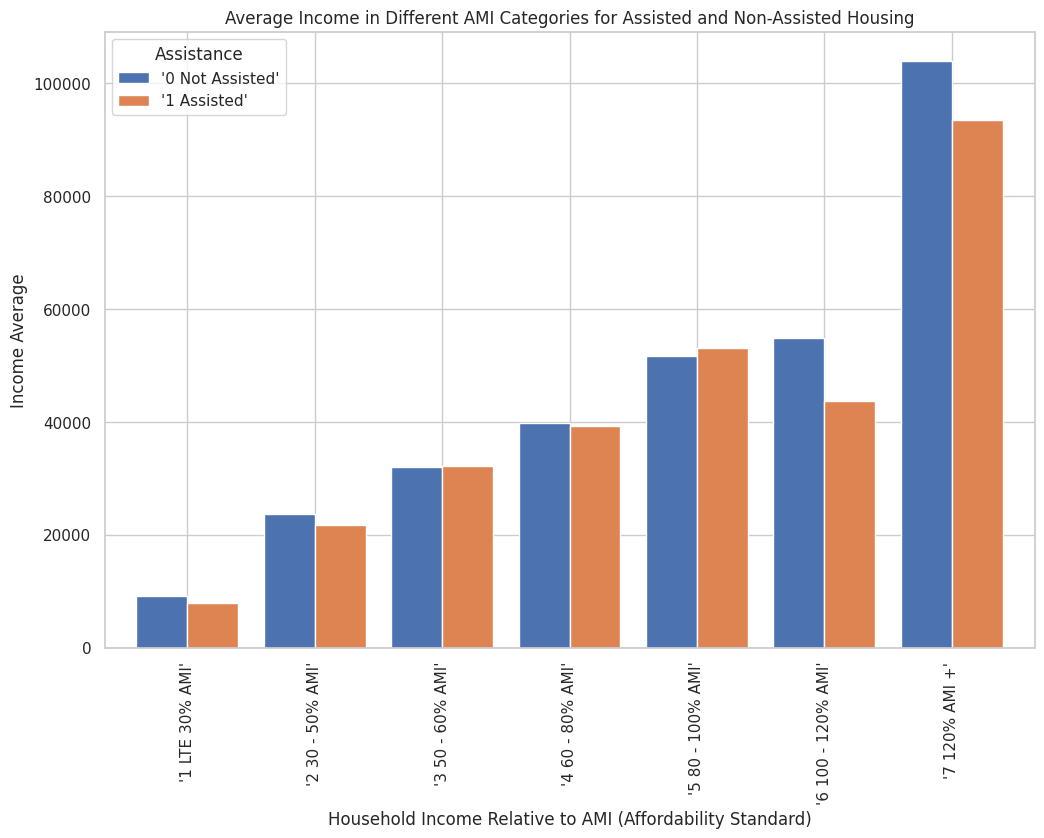

In [97]:
# Calculate the average income
income_avg = data6.groupBy('FMTINCRELAMICAT', 'FMTASSISTED').agg(avg('ZINC2').alias('avg_income'))

# Convert PySpark DataFrame to Pandas DataFrame for plotting
income_avg_pandas = income_avg.toPandas()

# Pivot the DataFrame for better visualization
income_avg_pivot = income_avg_pandas.pivot_table(index='FMTINCRELAMICAT', columns='FMTASSISTED', values='avg_income', aggfunc='mean')

# Plotting the bar graph with side-by-side bars
income_avg_pivot.plot(kind='bar', figsize=(12, 8), width=0.8)
plt.xlabel('Household Income Relative to AMI (Affordability Standard)')
plt.ylabel('Income Average')
plt.title('Average Income in Different AMI Categories for Assisted and Non-Assisted Housing')
plt.legend(title='Assistance')
plt.show()

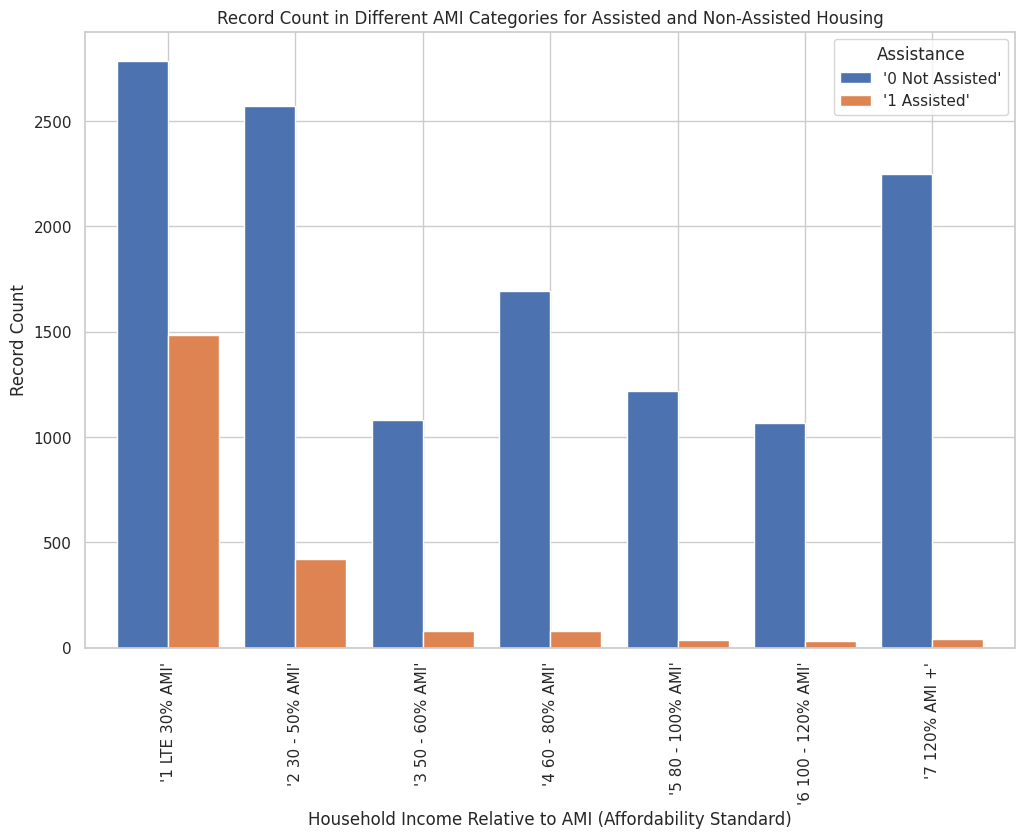

In [98]:
# Calculate the count of records
count_data = data6.groupBy('FMTINCRELAMICAT', 'FMTASSISTED').count().alias('record_count')

# Convert PySpark DataFrame to Pandas DataFrame for plotting
count_data_pandas = count_data.toPandas()

# Pivot the DataFrame for better visualization
count_data_pivot = count_data_pandas.pivot_table(index='FMTINCRELAMICAT', columns='FMTASSISTED', values='count', aggfunc='sum')

# Plotting the bar graph with side-by-side bars
count_data_pivot.plot(kind='bar', figsize=(12, 8), width=0.8)
plt.xlabel('Household Income Relative to AMI (Affordability Standard)')
plt.ylabel('Record Count')
plt.title('Record Count in Different AMI Categories for Assisted and Non-Assisted Housing')
plt.legend(title='Assistance')
plt.show()

5. Despite similar average incomes between assisted and non-assisted housing units in both Poverty and AMI income categories, what factors contribute to the provision of assistance to these households?

In [99]:
# Select the required columns
data7 = data.select('FMTASSISTED','FMTINCRELAMICAT','PER', 'AGE1')

# Remove rows with '.' in FMTBURDEN and FMTASSISTED
data7 = data7.filter(~col('FMTBURDEN').contains('.'))
data7 = data7.filter(~col('FMTASSISTED').contains('.'))

data7.show()

+----------------+------------------+---+----+
|     FMTASSISTED|   FMTINCRELAMICAT|PER|AGE1|
+----------------+------------------+---+----+
|'0 Not Assisted'|  '2 30 - 50% AMI'|  2|  30|
|'0 Not Assisted'|  '3 50 - 60% AMI'|  1|  52|
|'0 Not Assisted'|'6 100 - 120% AMI'|  1|  26|
|'0 Not Assisted'| '5 80 - 100% AMI'|  3|  45|
|'0 Not Assisted'|   '1 LTE 30% AMI'|  2|  22|
|'0 Not Assisted'|  '4 60 - 80% AMI'|  1|  43|
|    '1 Assisted'|  '2 30 - 50% AMI'|  2|  44|
|    '1 Assisted'|  '4 60 - 80% AMI'|  1|  82|
|'0 Not Assisted'|   '1 LTE 30% AMI'|  1|  30|
|'0 Not Assisted'| '5 80 - 100% AMI'|  4|  29|
|    '1 Assisted'|   '1 LTE 30% AMI'|  4|  35|
|    '1 Assisted'|  '2 30 - 50% AMI'|  4|  22|
|'0 Not Assisted'|  '2 30 - 50% AMI'|  5|  33|
|'0 Not Assisted'|'6 100 - 120% AMI'|  2|  49|
|'0 Not Assisted'|  '3 50 - 60% AMI'|  2|  38|
|'0 Not Assisted'|    '7 120% AMI +'|  1|  60|
|'0 Not Assisted'|  '2 30 - 50% AMI'|  2|  31|
|'0 Not Assisted'|    '7 120% AMI +'|  1|  32|
|'0 Not Assis

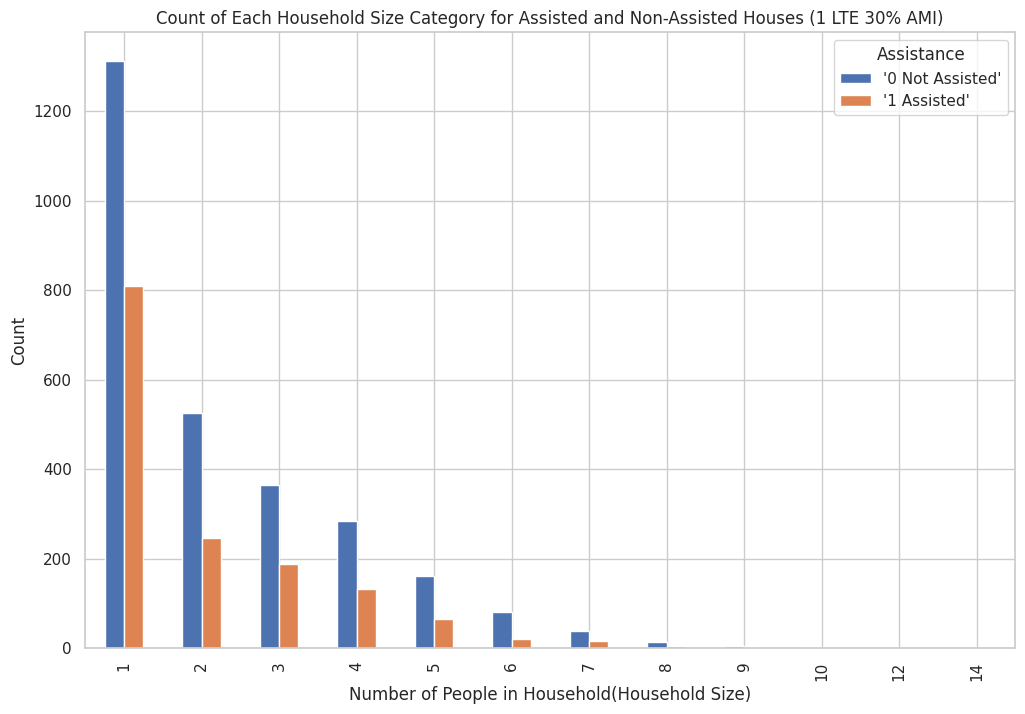

In [100]:
# Filter data for assisted houses with 1 LTE 30% AMI
data_filtered = data7.filter(col('FMTINCRELAMICAT').contains('1 LTE 30% AMI'))

# Group by PER and FMTASSISTED, and calculate the count
data_grouped = data_filtered.groupBy('PER', 'FMTASSISTED').count().toPandas()

# Pivot the DataFrame to have FMTASSISTED as columns
data_pivot = data_grouped.pivot_table(index='PER', columns='FMTASSISTED', values='count', aggfunc='sum')

# Plotting the bar chart with side-by-side bars
ax = data_pivot.plot(kind='bar', stacked=False, figsize=(12, 8))
ax.set_xlabel('Number of People in Household(Household Size)')
ax.set_ylabel('Count')
ax.set_title('Count of Each Household Size Category for Assisted and Non-Assisted Houses (1 LTE 30% AMI)')
ax.legend(title='Assistance')
plt.show()

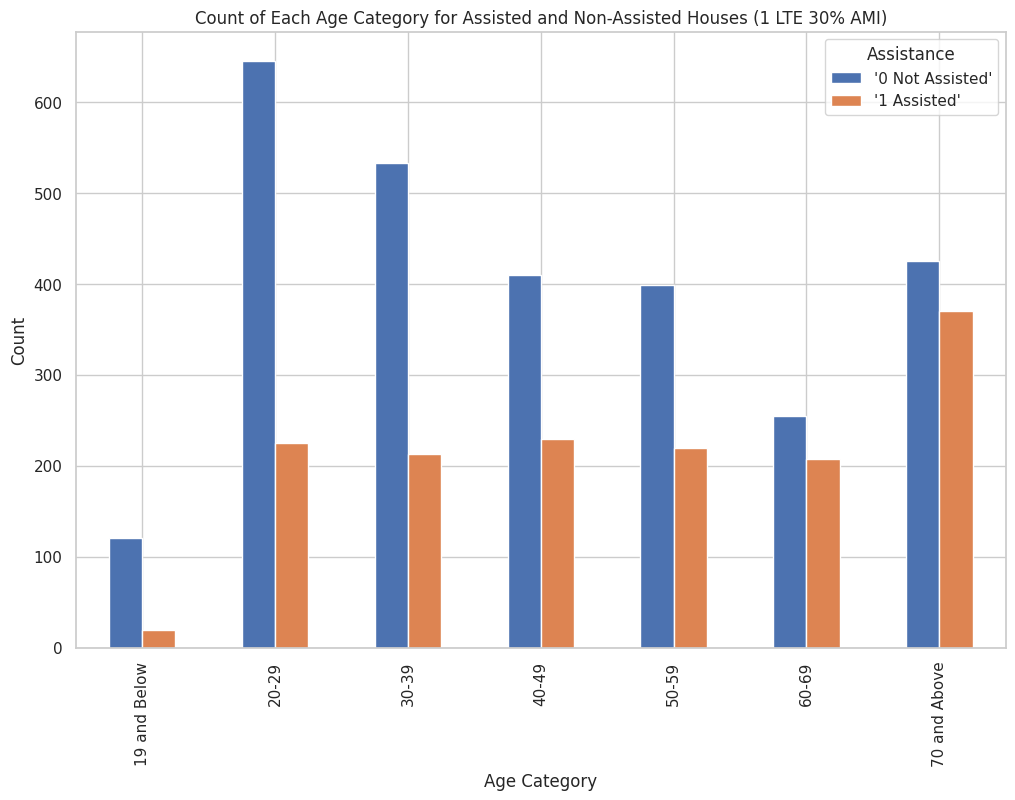

In [101]:
# Filter data for assisted houses with 1 LTE 30% Category in AMI
data_filtered = data7.filter(col('FMTINCRELAMICAT').contains('1 LTE 30% AMI'))

# Create age categories
data_filtered = data_filtered.withColumn("AGE_CATEGORY",
                         when(col("AGE1") <= 19, "19 and Below")
                         .when((col("AGE1") >= 20) & (col("AGE1") <= 29), "20-29")
                         .when((col("AGE1") >= 30) & (col("AGE1") <= 39), "30-39")
                         .when((col("AGE1") >= 40) & (col("AGE1") <= 49), "40-49")
                         .when((col("AGE1") >= 50) & (col("AGE1") <= 59), "50-59")
                         .when((col("AGE1") >= 60) & (col("AGE1") <= 69), "60-69")
                         .when(col("AGE1") >= 70, "70 and Above")
                         .otherwise("Unknown"))

# Group by Age and FMTASSISTED, and calculate the count
data_grouped = data_filtered.groupBy('AGE_CATEGORY', 'FMTASSISTED').count().toPandas()

# Pivot the DataFrame to have FMTASSISTED as columns
data_pivot = data_grouped.pivot_table(index='AGE_CATEGORY', columns='FMTASSISTED', values='count', aggfunc='sum')

# Plotting the bar chart with side-by-side bars
ax = data_pivot.plot(kind='bar', stacked=False, figsize=(12, 8),)
ax.set_xlabel('Age Category')
ax.set_ylabel('Count')
ax.set_title('Count of Each Age Category for Assisted and Non-Assisted Houses (1 LTE 30% AMI)')
ax.legend(title='Assistance')
plt.show()

6. How does the relationship between utility costs and housing burden change based on the number of people in a household and the available bedrooms?


In [102]:
# Showing distinct values
data.select('FMTBURDEN').distinct().show()
data.select('UTILITY').distinct().show()
data.select('FMTBEDRMS').distinct().show()
data.select('PER').distinct().show()

+-----------------+
|        FMTBURDEN|
+-----------------+
|'1 Less than 30%'|
|              '.'|
|    '4 No Income'|
|  '3 50% or More'|
|   '2 30% to 50%'|
+-----------------+

+-----------+
|    UTILITY|
+-----------+
|      299.0|
|      558.0|
|     224.75|
|     151.25|
|225.1666667|
|185.0833333|
|      78.75|
|282.8333333|
|410.1666667|
|      451.5|
|      305.0|
|       74.5|
|      168.5|
|     608.25|
|      596.0|
|       15.5|
|356.1666667|
|340.4166667|
|      769.0|
|     673.25|
+-----------+
only showing top 20 rows

+----------+
| FMTBEDRMS|
+----------+
|'0 Studio'|
|   '3 3BR'|
|   '1 1BR'|
|  '4 4BR+'|
|   '2 2BR'|
+----------+

+---+
|PER|
+---+
| 12|
|  1|
|  6|
|  3|
|  5|
| -6|
|  9|
|  4|
|  8|
|  7|
| 10|
| 11|
| 14|
|  2|
+---+



In [103]:
# Select the required columns
data3 = data.select('FMTBURDEN', 'UTILITY', 'FMTBEDRMS','PER').orderBy(asc('FMTBEDRMS'))

# Remove rows with '.' in FMTBURDEN
data3 = data3.filter(~col('FMTBURDEN').contains('.'))

# Remove rows with '-6' in PER
data3 = data3.filter(~col('PER').contains(-6))

# Displaying content of 'data3' dataframe
data3.show()

+-----------------+-------+----------+---+
|        FMTBURDEN|UTILITY| FMTBEDRMS|PER|
+-----------------+-------+----------+---+
|   '2 30% to 50%'|    0.0|'0 Studio'|  1|
|'1 Less than 30%'|  116.0|'0 Studio'|  1|
|'1 Less than 30%'|    0.0|'0 Studio'|  1|
|  '3 50% or More'|   60.0|'0 Studio'|  1|
|'1 Less than 30%'|    0.0|'0 Studio'|  1|
|   '2 30% to 50%'|    0.0|'0 Studio'|  1|
|  '3 50% or More'|  174.0|'0 Studio'|  1|
|  '3 50% or More'|    0.0|'0 Studio'|  1|
|  '3 50% or More'|    0.0|'0 Studio'|  1|
|'1 Less than 30%'|  142.0|'0 Studio'|  2|
|'1 Less than 30%'|   30.0|'0 Studio'|  1|
|'1 Less than 30%'|    0.0|'0 Studio'|  1|
|'1 Less than 30%'|   37.0|'0 Studio'|  1|
|  '3 50% or More'|    0.0|'0 Studio'|  1|
|  '3 50% or More'|   26.0|'0 Studio'|  1|
|'1 Less than 30%'|    0.0|'0 Studio'|  1|
|'1 Less than 30%'|   49.0|'0 Studio'|  2|
|   '2 30% to 50%'|   33.0|'0 Studio'|  2|
|  '3 50% or More'|    0.0|'0 Studio'|  1|
|  '3 50% or More'|    0.0|'0 Studio'|  1|
+----------

In [104]:
# Showing distinct values
data3.select('FMTBURDEN').distinct().show()
data3.select('UTILITY').distinct().show()
data3.select('FMTBEDRMS').distinct().show()
data3.select('PER').distinct().show()

+-----------------+
|        FMTBURDEN|
+-----------------+
|'1 Less than 30%'|
|    '4 No Income'|
|  '3 50% or More'|
|   '2 30% to 50%'|
+-----------------+

+-----------+
|    UTILITY|
+-----------+
|      299.0|
|      558.0|
|     224.75|
|     151.25|
|225.1666667|
|185.0833333|
|282.8333333|
|410.1666667|
|      451.5|
|      305.0|
|       74.5|
|      168.5|
|     608.25|
|      596.0|
|356.1666667|
|340.4166667|
|      769.0|
|     673.25|
|     315.75|
|      692.0|
+-----------+
only showing top 20 rows

+----------+
| FMTBEDRMS|
+----------+
|'0 Studio'|
|   '3 3BR'|
|   '1 1BR'|
|  '4 4BR+'|
|   '2 2BR'|
+----------+

+---+
|PER|
+---+
| 12|
|  1|
|  6|
|  3|
|  5|
|  9|
|  4|
|  8|
|  7|
| 10|
| 11|
| 14|
|  2|
+---+



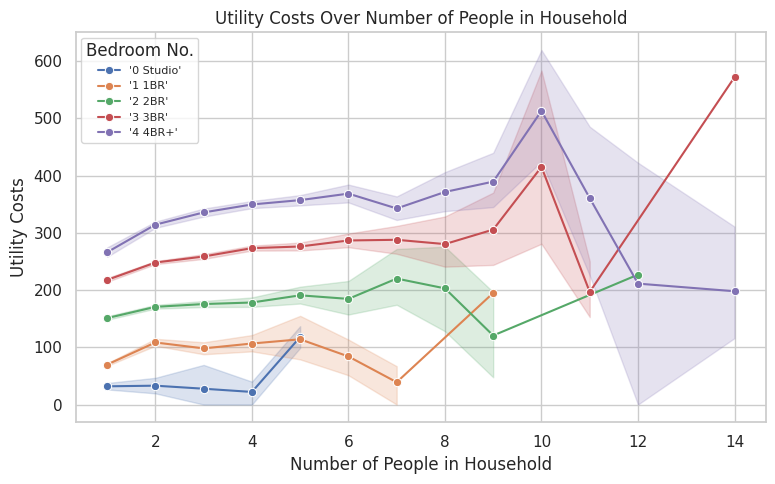

In [105]:
# Create line graphs
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.lineplot(x='PER', y='UTILITY', hue='FMTBEDRMS', data=data3.toPandas(), marker='o')
plt.title('Utility Costs Over Number of People in Household')
plt.xlabel('Number of People in Household')
plt.ylabel('Utility Costs')
plt.legend(title='Bedroom No.', fontsize=8)

plt.tight_layout()
plt.show()

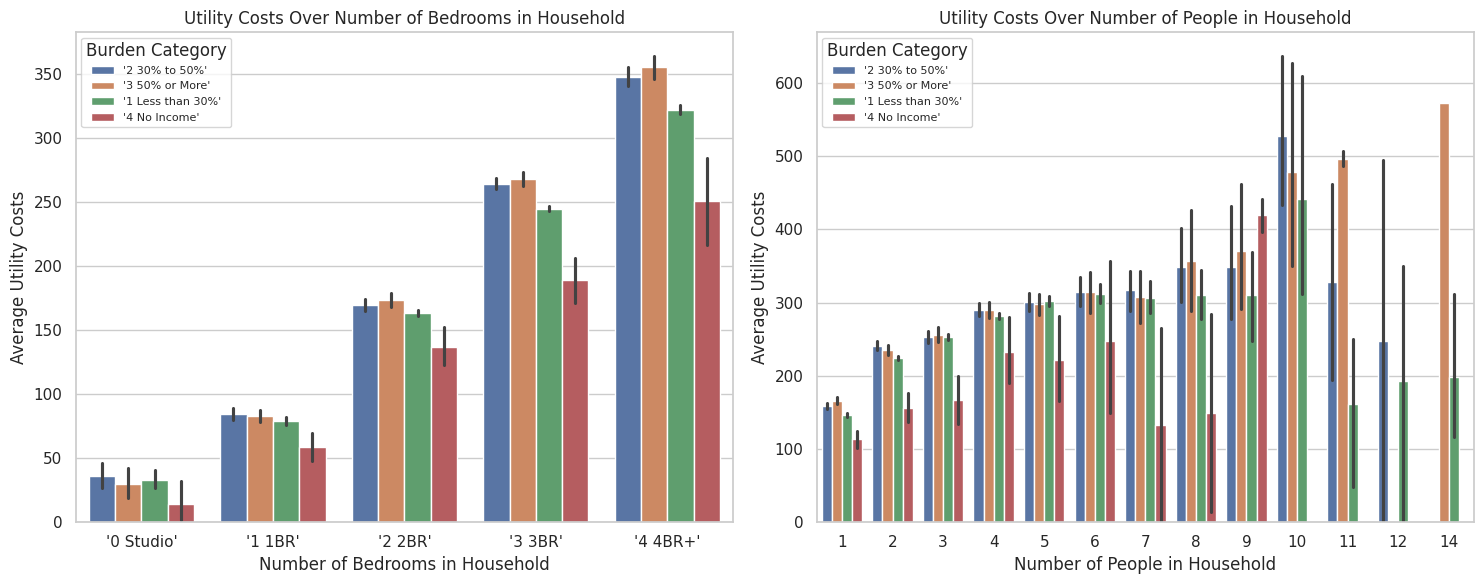

In [106]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create the first plot
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.barplot(x="FMTBEDRMS", y="UTILITY", hue="FMTBURDEN", data=data3.toPandas())
plt.title('Utility Costs Over Number of Bedrooms in Household')
plt.ylabel('Average Utility Costs')
plt.xlabel('Number of Bedrooms in Household')
plt.legend(title='Burden Category', fontsize=8)

# Create the second plot
plt.subplot(1, 2, 2)
sns.barplot(x="PER", y="UTILITY", hue="FMTBURDEN", data=data3.toPandas())
plt.title('Utility Costs Over Number of People in Household')
plt.ylabel('Average Utility Costs')
plt.xlabel('Number of People in Household')
plt.legend(title='Burden Category', fontsize=8)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

7. How does the household size influence the affordability of housing, particularly in relation to the top burden categories associated with different household sizes?

In [107]:
# Select the required columns
data9 = data.select('FMTBURDEN', 'FMTINCRELAMICAT', 'BEDRMS','PER').orderBy(asc("FMTBURDEN"))

# Remove rows with '.' in FMTINCRELAMICAT
data9 = data9.filter(~col('FMTINCRELAMICAT').contains('.'))

# Remove rows with '-6' in PER
data9 = data9.filter(~col('PER').contains(-6))


data9.select('FMTBURDEN').distinct().show()
data9.select('FMTINCRELAMICAT').distinct().show()
data9.select('PER').distinct().show()

data9.show()

+-----------------+
|        FMTBURDEN|
+-----------------+
|'1 Less than 30%'|
|    '4 No Income'|
|  '3 50% or More'|
|   '2 30% to 50%'|
+-----------------+

+------------------+
|   FMTINCRELAMICAT|
+------------------+
|  '2 30 - 50% AMI'|
|  '3 50 - 60% AMI'|
| '5 80 - 100% AMI'|
|  '4 60 - 80% AMI'|
|'6 100 - 120% AMI'|
|   '1 LTE 30% AMI'|
|    '7 120% AMI +'|
+------------------+

+---+
|PER|
+---+
| 12|
|  1|
|  6|
|  3|
|  5|
|  9|
|  4|
|  8|
|  7|
| 10|
| 11|
| 14|
|  2|
+---+

+-----------------+------------------+------+---+
|        FMTBURDEN|   FMTINCRELAMICAT|BEDRMS|PER|
+-----------------+------------------+------+---+
|'1 Less than 30%'| '5 80 - 100% AMI'|     4|  4|
|'1 Less than 30%'|    '7 120% AMI +'|     3|  3|
|'1 Less than 30%'|    '7 120% AMI +'|     3|  1|
|'1 Less than 30%'|  '4 60 - 80% AMI'|     2|  4|
|'1 Less than 30%'| '5 80 - 100% AMI'|     2|  1|
|'1 Less than 30%'|'6 100 - 120% AMI'|     3|  6|
|'1 Less than 30%'|  '4 60 - 80% AMI'|     2|  2|
|'1 

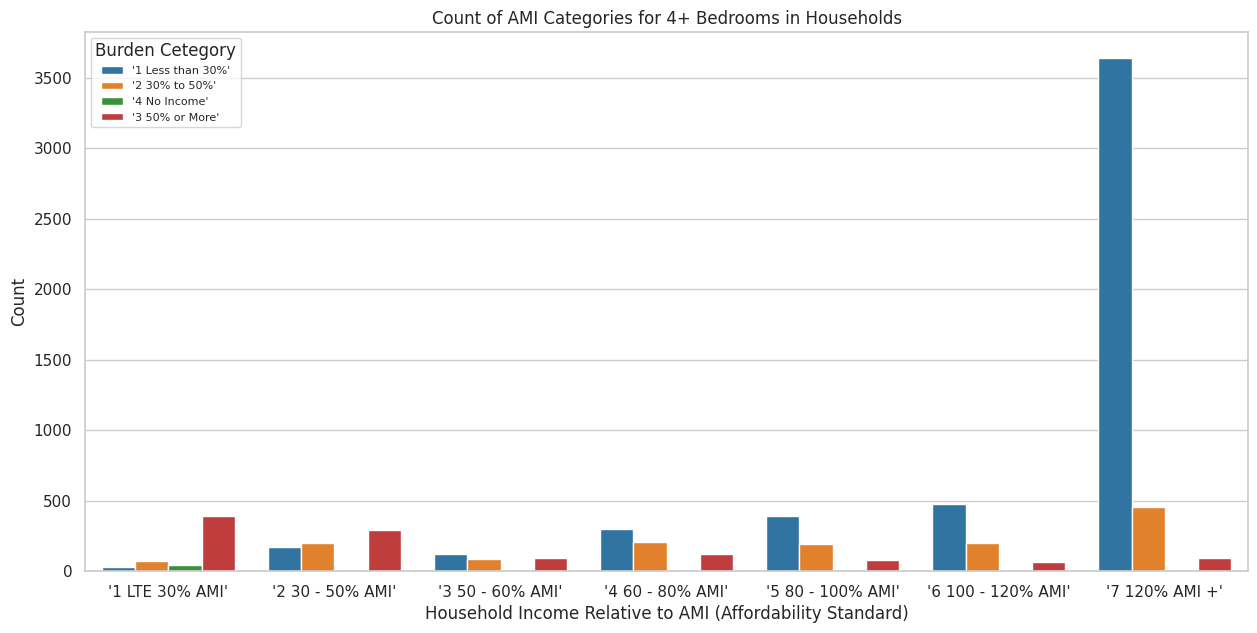

In [108]:
# Filter data for the two conditions
data_bedrooms = data9.filter((col('BEDRMS') == 4 ) & (col('FMTINCRELAMICAT').isNotNull()))
data_people = data9.filter((col('PER') == 10) & (col('FMTINCRELAMICAT').isNotNull()))

# Count the occurrences of each AMI category for 4+ bedrooms
count_bedrooms = data_bedrooms.groupBy('FMTINCRELAMICAT','FMTBURDEN').count().orderBy(asc("FMTINCRELAMICAT")).toPandas()

# Count the occurrences of each AMI category for 10 people in PER
count_people = data_people.groupBy('FMTINCRELAMICAT','FMTBURDEN').count().orderBy(asc("FMTINCRELAMICAT")).toPandas()

# Plotting the bar chart for 4+ bedrooms
plt.figure(figsize=(15, 7))
sns.barplot(x='FMTINCRELAMICAT', y='count', data=count_bedrooms, palette='tab10', hue='FMTBURDEN')
plt.xlabel('Household Income Relative to AMI (Affordability Standard)')
plt.ylabel('Count')
plt.title('Count of AMI Categories for 4+ Bedrooms in Households')
plt.legend(title='Burden Cetegory', fontsize=8)
plt.show()

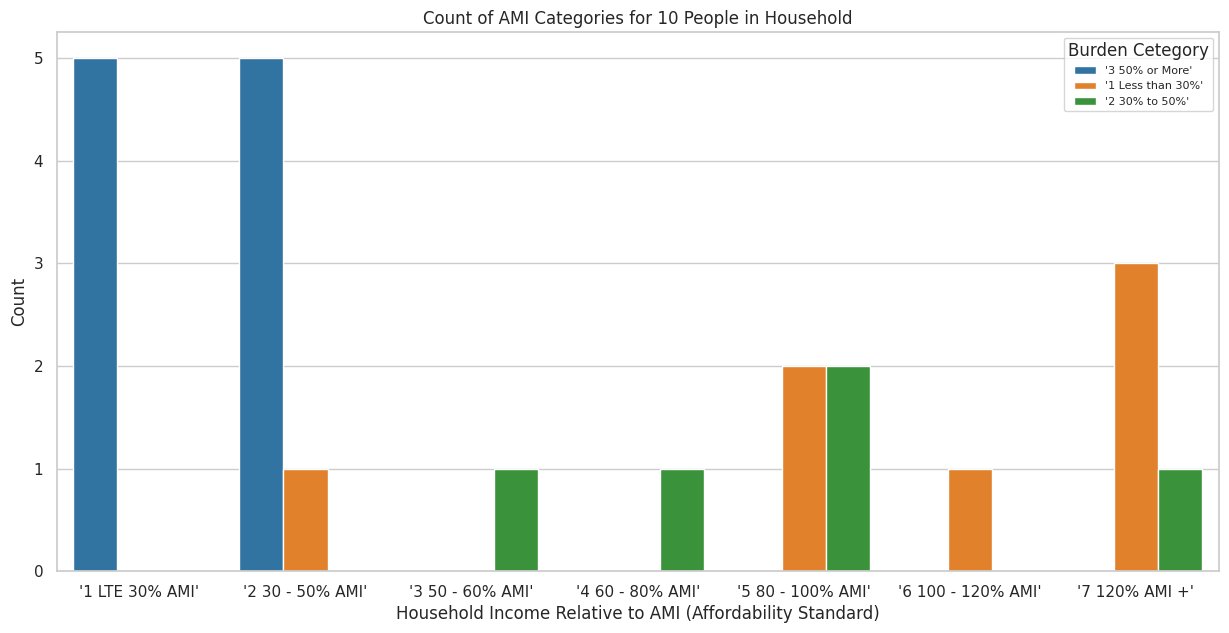

In [109]:
# Plotting the bar chart for 10 people in PER
plt.figure(figsize=(15, 7))
sns.barplot(x='FMTINCRELAMICAT', y='count', data=count_people, palette='tab10', hue='FMTBURDEN')
plt.xlabel('Household Income Relative to AMI (Affordability Standard)')
plt.ylabel('Count')
plt.title('Count of AMI Categories for 10 People in Household')
plt.legend(title='Burden Cetegory', fontsize=8)
plt.show()

8. How does the burden of housing costs change with the age of the head of the household?

In [110]:
# Select the required columns
data4 = data.select('AGE1', 'FMTBURDEN')

# Remove rows with '.' in FMTBURDEN
data4 = data4.filter(~col('FMTBURDEN').contains('.'))

data4.select('AGE1').distinct().show(10)

data4.show()

+----+
|AGE1|
+----+
|  31|
|  85|
|  65|
|  53|
|  78|
|  34|
|  81|
|  28|
|  76|
|  26|
+----+
only showing top 10 rows

+----+-----------------+
|AGE1|        FMTBURDEN|
+----+-----------------+
|  87|'1 Less than 30%'|
|  70|'1 Less than 30%'|
|  48|'1 Less than 30%'|
|  62|   '2 30% to 50%'|
|  30|  '3 50% or More'|
|  52|'1 Less than 30%'|
|  46|'1 Less than 30%'|
|  56|'1 Less than 30%'|
|  26|'1 Less than 30%'|
|  55|'1 Less than 30%'|
|  50|'1 Less than 30%'|
|  45|'1 Less than 30%'|
|  25|   '2 30% to 50%'|
|  48|'1 Less than 30%'|
|  63|'1 Less than 30%'|
|  22|  '3 50% or More'|
|  43|'1 Less than 30%'|
|  51|'1 Less than 30%'|
|  34|  '3 50% or More'|
|  53|'1 Less than 30%'|
+----+-----------------+
only showing top 20 rows



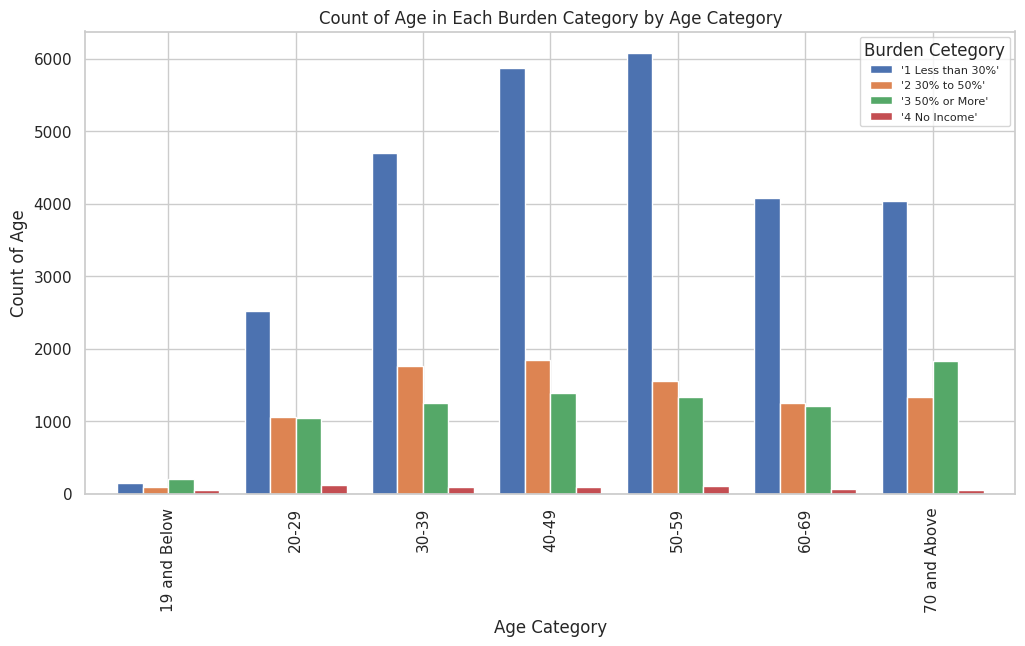

In [111]:
# Define age categories based on AGE1 column
data4 = data4.withColumn("AGE_CATEGORY",
                         when(col("AGE1") <= 19, "19 and Below")
                         .when((col("AGE1") >= 20) & (col("AGE1") <= 29), "20-29")
                         .when((col("AGE1") >= 30) & (col("AGE1") <= 39), "30-39")
                         .when((col("AGE1") >= 40) & (col("AGE1") <= 49), "40-49")
                         .when((col("AGE1") >= 50) & (col("AGE1") <= 59), "50-59")
                         .when((col("AGE1") >= 60) & (col("AGE1") <= 69), "60-69")
                         .when(col("AGE1") >= 70, "70 and Above")
                         .otherwise("Unknown"))

# Group by AGE_CATEGORY and FMTBURDEN, and calculate the count
data_grouped = data4.groupBy("AGE_CATEGORY", "FMTBURDEN").count()

# Convert PySpark DataFrame to Pandas DataFrame for plotting
data_pandas = data_grouped.toPandas()

# Pivot the DataFrame to have FMTBURDEN as columns with side-by-side bars
data_pandas_pivoted = data_pandas.pivot_table(index="AGE_CATEGORY", columns="FMTBURDEN", values="count", aggfunc="sum")

# Plotting the bar chart with side-by-side bars
ax = data_pandas_pivoted.plot(kind='bar', figsize=(12, 6), width=0.8)
ax.set_xlabel('Age Category')
ax.set_ylabel('Count of Age')
ax.set_title('Count of Age in Each Burden Category by Age Category')
plt.legend(title='Burden Cetegory', fontsize=8)

# Display the plot
plt.show()